# Exploring Airbnb Listings in Berlin

## Introduction
> Airbnb is an online marketplace that lets property owners rent out their spaces to travelers looking for a place to stay. Since its inception, Airbnb has expanded accommodation options for travelers who can visit various cities and enjoy experiences in new destinations. Today, Airbnb is a well-known establishment in the tourism industry and has racked up more than 150 million users. Using data to drive business decisions has long been a crucial component of Airbnb’s philosophy. With that being said, they allow individuals access to their rich database covering listings across multiple cities and encourage analyses on their plethora of data. In this project, we will be specifically analyzing data based on listings found in the city of Berlin, Germany.  The aim of this project is to 1. Demonstrate my skills in database creation 2.  Demonstrate my skills in querying databases 3. Demonstrate my skills in building visualizations in Tableau. The first part of this project will focus on the creation of the database, while the second part will be centered on answering questions regarding the database with the aim of exploring the different characteristics of listings in Berlin. All queries have an accompanying visual that can be found on my public tableau Dashboard: https://public.tableau.com/app/profile/omar.stinner/viz/AirbnbDashboard_16382662259950/AirbnbDashboard?publish=yes - each visual is titled with its respective question.  All the files and scripts used in this analysis are available in my repository.

In [4]:
#Importing the Relevant Libraries and the SQL Engine

import sqlalchemy
sqlalchemy.create_engine("sqlite:///foo.db")
%load_ext sql
%sql sqlite:///airbnb_berlin.db

'Connected: @airbnb_berlin.db'

## Part 1: Database Creation

### Data Source

> The following files, acquired from http://insideairbnb.com/get-the-data.html, were used to build the Airbnb database:
> - listings.csv.gz - Detailed Listings data for Berlin
> - calendar.csv.gz - Detailed Calendar Data for listings in Berlin
> - reviews.csv.gz - Detailed Review Data for listings in Berlin

> Relevant data was extracted from these files to create new csv files to populate the tables in the below database schema.

### Selected Database Schema

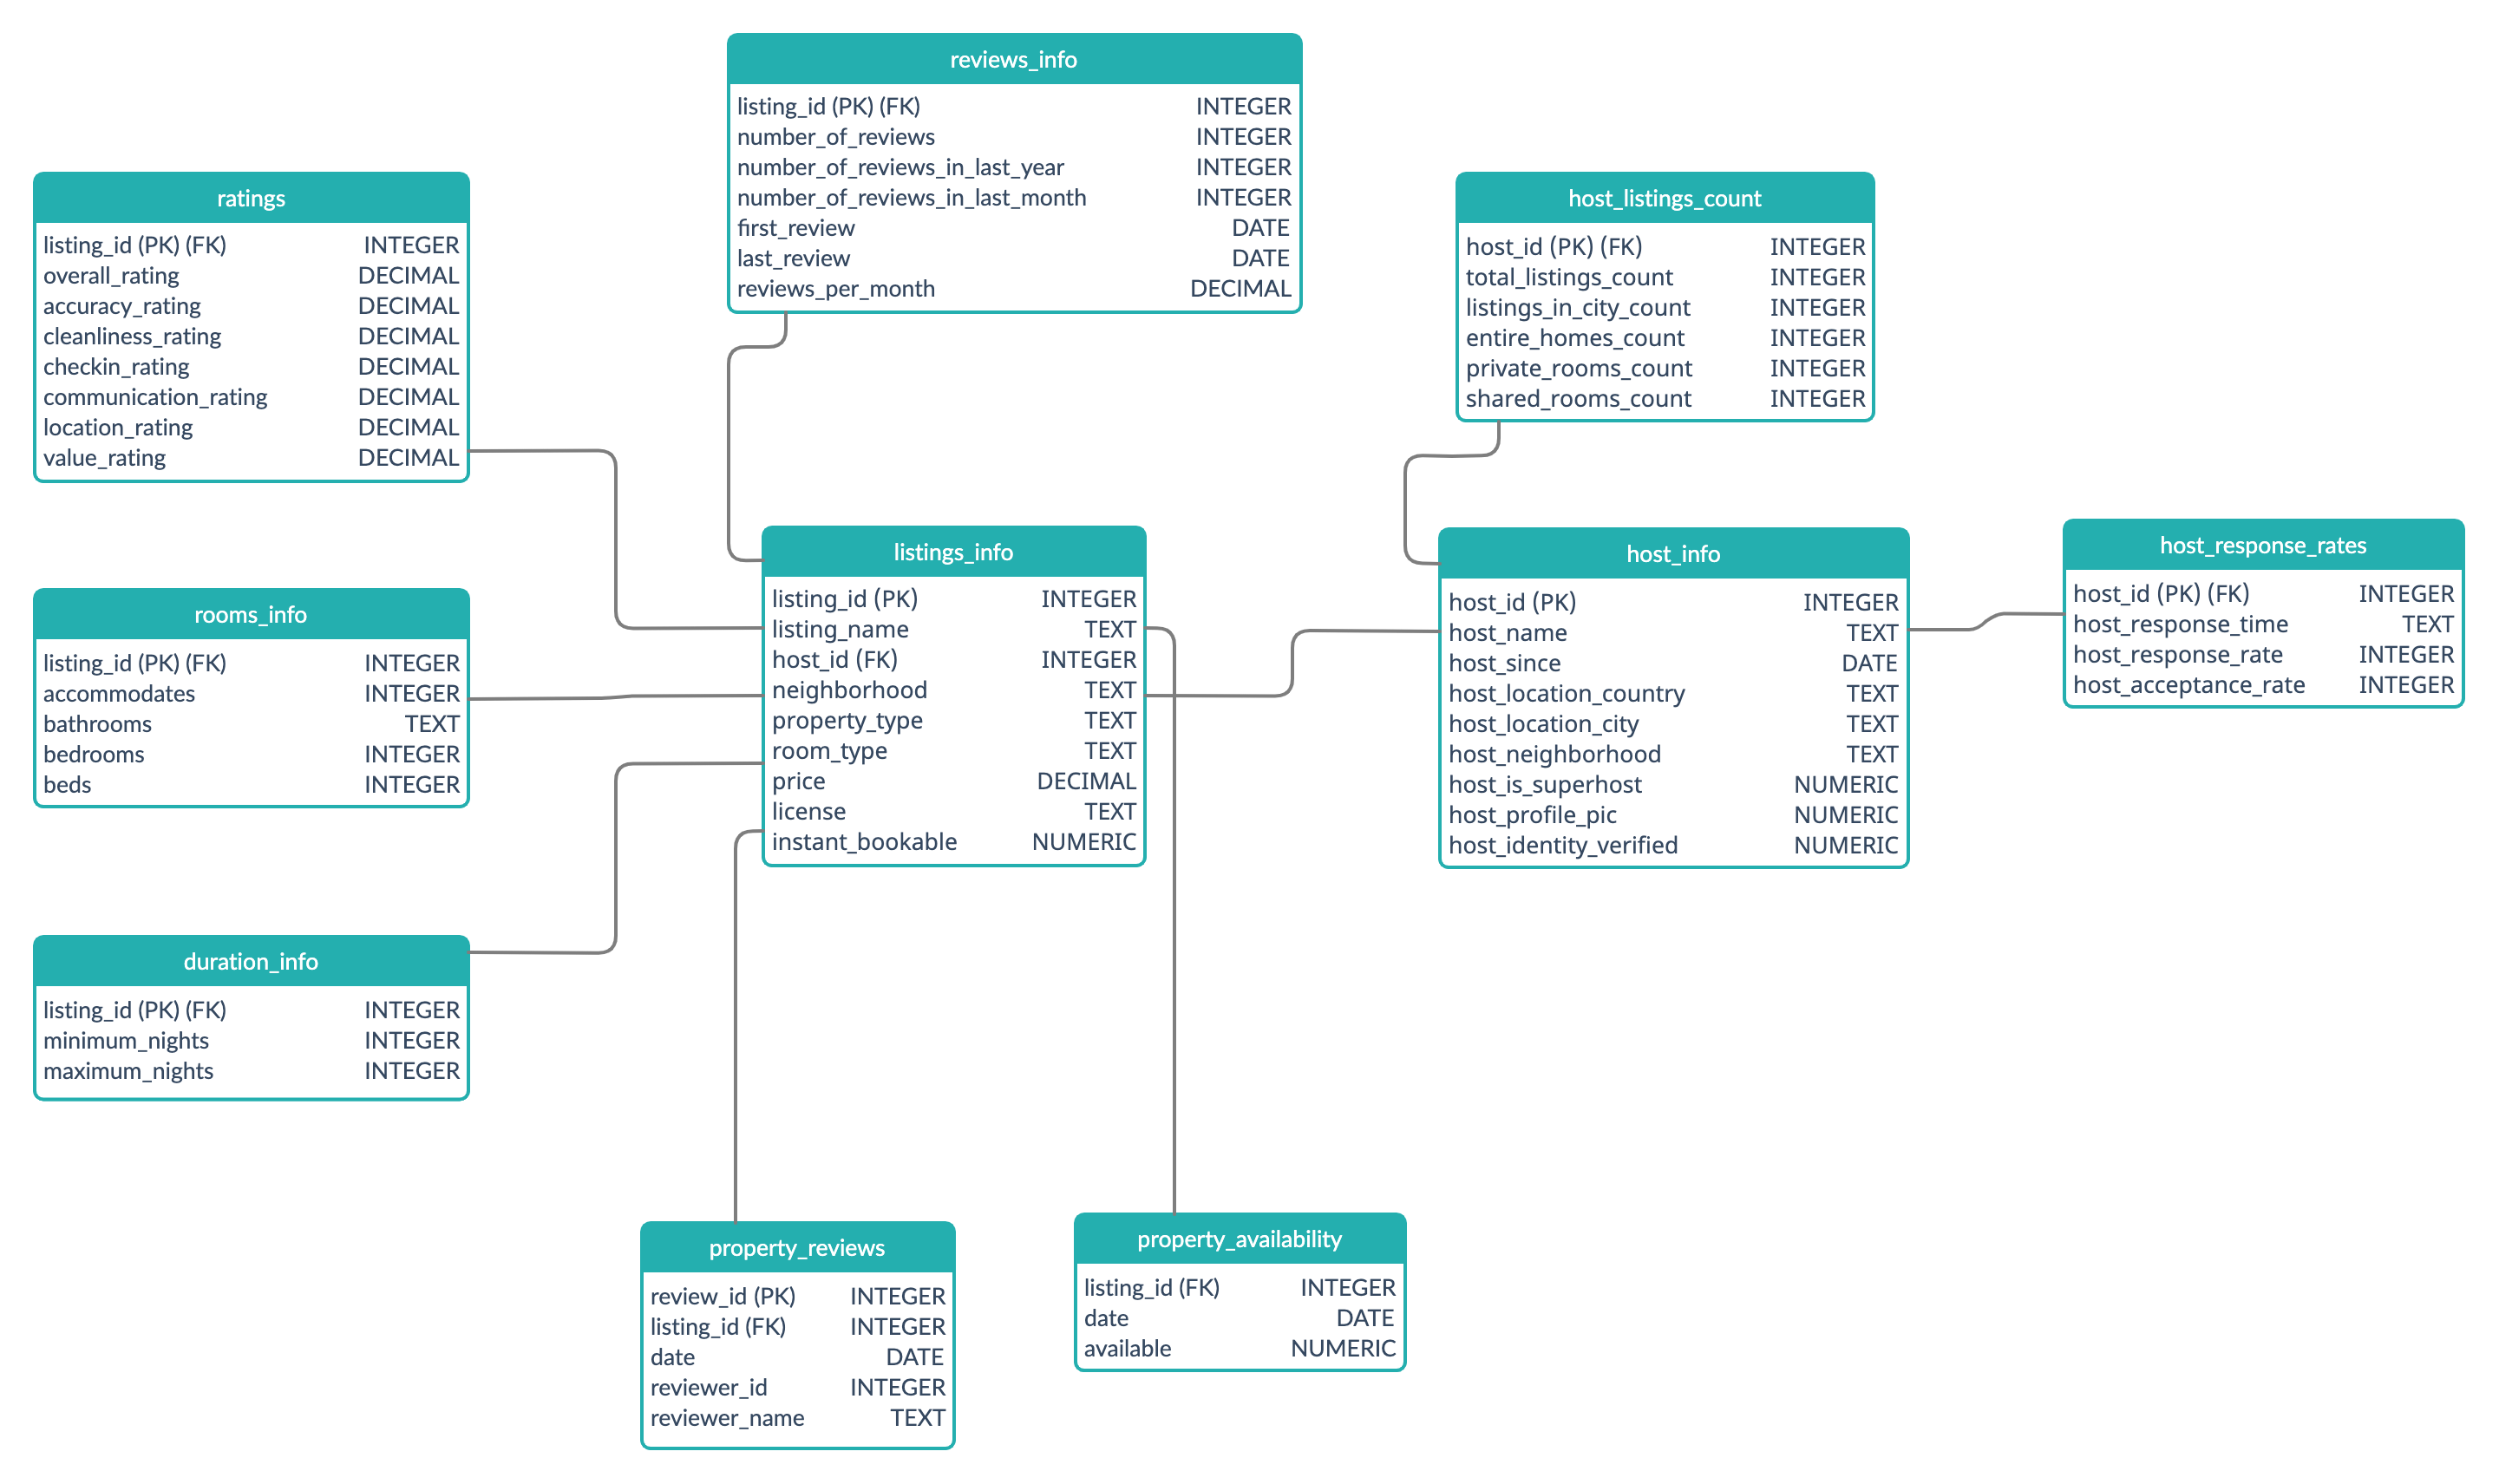

### Creating The Database

In [ ]:
%%sql

-- Drop tables if they exists

DROP TABLE IF EXISTS host_info;
DROP TABLE IF EXISTS listings_info;
DROP TABLE IF EXISTS duration_info;
DROP TABLE IF EXISTS rooms_info;
DROP TABLE IF EXISTS ratings;
DROP TABLE IF EXISTS reviews_info;
DROP TABLE IF EXISTS property_reviews;
DROP TABLE IF EXISTS property_availability;
DROP TABLE IF EXISTS host_listings_count;
DROP TABLE IF EXISTS host_reponse_rates;

-- Creating host_info table

CREATE TABLE host_info (
    host_id                INTEGER PRIMARY KEY,
    host_name              TEXT,
    host_since             DATE,
    host_location_country  TEXT,
    host_location_city     TEXT,
    host_neighborhood      TEXT,
    host_is_superhost      NUMERIC,
    has_profile_pic        NUMERIC,
    host_identity_verified NUMERIC
);

-- Creating listing_info table

CREATE TABLE listings_info (
    listing_id       INTEGER PRIMARY KEY,
    listing_name     TEXT,
    host_id          INTEGER REFERENCES host_info (host_id),
    neighborhood     TEXT,
    property_type    TEXT,
    room_type        TEXT,
    price            DECIMAL,
    license          TEXT,
    instant_bookable NUMERIC
);

-- Creating duration_info table

CREATE TABLE duration_info (
    listing_id     INTEGER PRIMARY KEY
                           REFERENCES listings_info (listing_id),
    minimum_nights INTEGER,
    maximum_nights INTEGER
);

-- Creating rooms_info table

CREATE TABLE rooms_info (
    listing_id   INTEGER PRIMARY KEY
                         REFERENCES listings_info (listing_id),
    accommodates INTEGER,
    bathrooms    TEXT,
    bedrooms     INTEGER,
    beds         INTEGER
);

-- Creating ratings table

CREATE TABLE ratings (
    listing_id           INTEGER PRIMARY KEY
                                 REFERENCES listings_info (listing_id),
    overall_rating       DECIMAL,
    accuracy_rating      DECIMAL,
    cleanliness_rating   DECIMAL,
    checkin_rating       DECIMAL,
    communication_rating DECIMAL,
    location_rating      DECIMAL,
    value_rating         DECIMAL
);

-- Creating reviews_info table

CREATE TABLE reviews_info (
    listing_id                      INTEGER PRIMARY KEY
                                            REFERENCES listings_info (listing_id),
    number_of_reviews               INTEGER,
    number_of_reviews_in_last_year  INTEGER,
    number_of_reviews_in_last_month INTEGER,
    first_review                    DATE,
    last_review                     DATE,
    reviews_per_month               DECIMAL
);

-- Creating property_reviews table

CREATE TABLE property_reviews (
    listing_id    INTEGER REFERENCES listings_info (listing_id),
    review_id     INTEGER PRIMARY KEY,
    date          DATE,
    reviewer_id   INTEGER,
    reviewer_name TEXT
);

-- Creating property_availability table

CREATE TABLE property_availability (
    listing_id INTEGER REFERENCES listings_info (listing_id),
    date       DATE,
    available  NUMERIC
);

-- Creating host_listings_count table

CREATE TABLE host_listings_count (
    host_id                INTEGER PRIMARY KEY
                                   REFERENCES host_info (host_id),
    total_listings_count   INTEGER,
    listings_in_city_count INTEGER,
    entire_homes_count     INTEGER,
    private_rooms_count    INTEGER,
    shared_rooms_count     INTEGER
);

-- Creating host_response_rates table

CREATE TABLE host_response_rates (
    host_id              INTEGER PRIMARY KEY
                                 REFERENCES host_listings_count (host_id),
    host_response_time   TEXT,
    host_response_rate   INTEGER,
    host_acceptance_rate INTEGER
);

### Setting The Indexes

In [ ]:
%%sql

-- Creating indexes for the tables

-- Creating indexes for the host_info table

CREATE INDEX host_info_host_id_index ON host_info (
    host_id
);

CREATE INDEX host_info_host_is_superhost_index ON host_info (
    host_is_superhost
);

-- Creating indexes for the listings_info table

CREATE INDEX listing_info_host_id_index ON listings_info (
    host_id
);

CREATE INDEX listing_info_listing_id_index ON listings_info (
     listing_id
);

CREATE INDEX listing_info_neighborhood_index ON listings_info (
    neighborhood
);

CREATE INDEX listing_info_price_index ON listings_info (
    price
);


### Populating The Tables

In [ ]:
%%sql

-- Import data into host_info table

.import '| tail -n +2 host_info.csv' host_info

-- Import data into listings_info table

.import '| tail -n +2 listings_info.csv' listings_info

-- Import data into duration_info table

.import '| tail -n +2 duration_info.csv' duration_info

-- Import data into rooms_info table

.import '| tail -n +2 rooms_info.csv' rooms_info

-- Import data into ratings table

.import '| tail -n +2 ratings.csv' ratings

-- Import data into reviews_info table

.import '| tail -n +2 reviews_info.csv' reviews_info

-- Import data into property_reviews table

.import '| tail -n +2 property_reviews.csv' property_reviews

-- Import data into property_availability table

.import '| tail -n +2 property_availability.csv' property_availability

-- Import data into host_listings_count table

.import '| tail -n +2 host_listings_count.csv' host_listings_count

-- Import data into host_response_rates table

.import '| tail -n +2 host_response_acceptance_rate' host_response_rates


### Cleaning The Tables

#### Cleaning "host_info" Table

In [ ]:
%%sql

-- Cleaning host_is_superhost column

UPDATE host_info
SET host_is_superhost = 0
WHERE host_is_superhost = "f";

UPDATE host_info
SET host_is_superhost = 1
WHERE host_is_superhost = "t";

-- Cleaning has_profile_pic column

UPDATE host_info
SET has_profile_pic = 0
WHERE has_profile_pic = "f";

UPDATE host_info
SET has_profile_pic = 1
WHERE has_profile_pic = "t";

-- Cleaning host_identity_verified column

UPDATE host_info
SET host_identity_verified = 0
WHERE host_identity_verified = "f";

UPDATE host_info
SET host_identity_verified = 1
WHERE host_identity_verified = "t";

-- Cleaning host_location column

-- Splitting the host_location column to host_location_city and host_location_country

ALTER TABLE host_info_new
ADD COLUMN host_location_city TEXT;

UPDATE host_info_new
SET host_location_city = SUBSTRING(host_location, 0, INSTR(host_location, ","));

UPDATE host_info_new
SET host_location = REPLACE(host_location,SUBSTRING(host_location, 1, INSTR(host_location, ",")),"");

UPDATE host_info_new
SET host_location = TRIM(REPLACE(host_location,SUBSTRING(host_location,1,INSTR(host_location, ",")),""));

-- Setting to Germany

UPDATE host_info_new
SET host_location = "Germany"
WHERE host_location LIKE "%berlin%" OR host_location LIKE "%neuk%" 
      OR host_location LIKE "%Deutschland%"
      OR host_location = "DE"
      OR host_location = "UK/DE";
      
-- Setting to Russia

UPDATE host_info_new
SET host_location = "Russia"
WHERE host_location LIKE "%federation%" OR host_location = "RU";

-- Setting to Spain

UPDATE host_info_new
SET host_location = "Spain"
WHERE host_location LIKE "%spa%" OR host_location = "ES";

-- Setting to France

UPDATE host_info_new
SET host_location = "France"
WHERE host_location = "FR";

-- Setting to NULL

UPDATE host_info_new
SET host_location = NULL
WHERE host_location = "europe" OR host_location LIKE "%public tra%" OR host_location LIKE  "%your%";

-- Setting to Switzerland

UPDATE host_info_new
SET host_location = "Switzerland"
WHERE host_location LIKE "%canton%" OR host_location LIKE "%schw%";

-- Setting to United States

UPDATE host_info_new
SET host_location = "United States"
WHERE host_location = "US" OR host_location LIKE "%puerto%";

-- Setting to United Kingdom

UPDATE host_info_new
SET host_location = "United Kingdom"
WHERE host_location LIKE "%northern%";

-- Setting to Argentina

UPDATE host_info_new
SET host_location = "Argentina"
WHERE host_location LIKE "%auto%" OR host_location = "AR";

-- Setting to South Korea

UPDATE host_info_new
SET host_location = "South Korea"
WHERE host_location LIKE "%buch%" OR host_location = "KR";

-- Setting to Ireland

UPDATE host_info_new
SET host_location = "Ireland"
WHERE host_location = "County  Ireland";

-- Setting to Canada

UPDATE host_info_new
SET host_location = "Canada"
WHERE host_location = "CA";

-- Setting to Egypt

UPDATE host_info_new
SET host_location = "Egypt"
WHERE host_location = "EG";

-- Setting to Luxembourg

UPDATE host_info_new
SET host_location = "Luxembourg"
WHERE host_location LIKE "%district%";

-- Setting to Hong Kong

UPDATE host_info_new
SET host_location = "Hong Kong"
WHERE host_location LIKE "%hongkong%" OR host_location = "HONG KONG";

-- Setting to Italy

UPDATE host_info_new
SET host_location = "Italy"
WHERE host_location LIKE "%Sued%";

-- Setting to Israel

UPDATE host_info_new
SET host_location = "Israel"
WHERE host_location LIKE "%Afula%";

-- Setting to Denmark

UPDATE host_info_new
SET host_location = "Denmark"
WHERE host_location = "Danmark";

-- Setting to Cyprus

UPDATE host_info_new
SET host_location = "Cyprus"
WHERE host_location = "nicosia";

-- Setting to Czech Republic

UPDATE host_info_new
SET host_location = "Czech Republic"
WHERE host_location = "Czechia";

-- Setting to Brazil

UPDATE host_info_new
SET host_location = "Brazil"
WHERE host_location = "State of  Brazil";

#### Cleaning "host_response_rates" Table

In [ ]:
%%sql

UPDATE host_response_rates
SET host_response_rate = REPLACE(host_response_rate, "%", ""),
    host_acceptance_rate = REPLACE(host_acceptance_rate, "%", "");

#### Cleaning "listings_info" Table

In [ ]:
%%sql

UPDATE listings_info
SET price = REPLACE(price,"$", "");

UPDATE listings_info
SET instant_bookable = 0
WHERE instant_bookable = "f";

UPDATE listings_info
SET instant_bookable = 1
WHERE instant_bookable = "t";

UPDATE listings_info
SET neighborhood = "Friedrichshain"
WHERE neighborhood LIKE "%Fried%";

UPDATE listings_info
SET neighborhood = "Neukolln"
WHERE neighborhood LIKE "%Neuk%";

UPDATE listings_info
SET neighborhood = "Tempelhof"
WHERE neighborhood LIKE "%Tempe%";

UPDATE listings_info
SET neighborhood = "Charlottenburg"
WHERE neighborhood LIKE "%Charlott%";

UPDATE listings_info
SET neighborhood = "Steglitz"
WHERE neighborhood LIKE "%Steglitz%";

UPDATE listings_info
SET neighborhood = "Treptow"
WHERE neighborhood LIKE "%Treptow%";

UPDATE listings_info
SET neighborhood = "Marzahn"
WHERE neighborhood LIKE "%Marzahn%";

UPDATE listings_info
SET license = (CASE
               WHEN license = "" THEN 0
               WHEN license IS NOT NULL THEN 1
               END);

#### Cleaning "property_availability" Table

In [ ]:
%%sql

UPDATE property_availability
SET available = 0
WHERE available = "f";

UPDATE property_availability
SET available = 1
WHERE available = "t";

## Part 2: Querying the Database to Answer Questions

### Q1 Part 1: How well are neighborhoods performing each month?

>#### Context
>Each cell represents the “performance” of a neighborhood in each month. “performance” is measured by calculating the proportion of “high_demand” listings in each month for each neighborhood. A listing is categorized as “high_demand” for the month if it’s booked for more than 23 days of the month. For example, the first cell reads.

In [23]:
%%sql

WITH

-- Creating a month column

selecting_months AS
(
SELECT *,
        STRFTIME("%m", date) AS "month"
FROM property_availability
ORDER BY listing_id
),

-- Calculating how many booking each listing gets in a month

bookings_per_month AS
(
SELECT listing_id, month, SUM(available) AS "bookings_per_month"
FROM selecting_months
GROUP BY listing_id, month
),

-- Labeling whether a particular month for a listing is no_demand, low_demand, mid_low_demand, mid_high_demand, high_demand

demand AS
(
SELECT *,
       CASE
       WHEN bookings_per_month = 0 THEN "no_demand"
       WHEN bookings_per_month >= 1 AND bookings_per_month <= 8 THEN "low_demand"
       WHEN bookings_per_month >= 9 AND bookings_per_month <= 15 THEN "mid_low_demand"
       WHEN bookings_per_month >= 16 AND bookings_per_month <= 23 THEN "mid_high_demand"
       ELSE "high_demand"
       END AS "demand"
FROM bookings_per_month
),

-- Specifically analyzing the high demand portion of neighborhoods for each month 

neighborhood_month_count AS
(
SELECT  d.month,
        d.demand,
        li.neighborhood,
        COUNT(*) AS "neighborhood_month_count"
FROM demand AS d INNER JOIN listings_info AS li ON d.listing_id = li.listing_id
WHERE d.demand = "high_demand"
GROUP BY d.month, d.demand, li.neighborhood
),

-- Creating a performance column to see how much (as a percentage) of a neighborhoods listings are in high demand for each month

high_demand_neighborhood_monthly_performance AS
(
SELECT *,
       ROUND((CAST(nmc.neighborhood_month_count AS FLOAT) / nc.neighborhood_count) * 100, 2) "performance"
FROM neighborhood_month_count AS nmc INNER JOIN (SELECT neighborhood,
                                                        COUNT(*) AS neighborhood_count
                                                        FROM listings_info
                                                        GROUP BY neighborhood) AS nc ON nmc.neighborhood = nc.neighborhood
)

-- Creating a pivot table to visualize the percenatge of high demand listings in each neigborhood for each month

SELECT neighborhood, MAX("jan") jan, MAX("feb") feb, MAX("mar") mar,
                     MAX("apr") apr, MAX("may") may, MAX("jun") jun,
                     MAX("jul") jul, MAX("aug") aug, MAX("sep") sep,
                     MAX("oct") oct, MAX("nov") nov, MAX("dec") dec
        FROM (SELECT neighborhood,
                     CASE WHEN month = "01" THEN performance || "%" END "jan",
                     CASE WHEN month = "02" THEN performance || "%" END "feb",
                     CASE WHEN month = "03" THEN performance || "%" END "mar",
                     CASE WHEN month = "04" THEN performance || "%" END "apr",
                     CASE WHEN month = "05" THEN performance || "%" END "may",
                     CASE WHEN month = "06" THEN performance || "%" END "jun",
                     CASE WHEN month = "07" THEN performance || "%" END "jul",
                     CASE WHEN month = "08" THEN performance || "%" END "aug",
                     CASE WHEN month = "09" THEN performance || "%" END "sep",
                     CASE WHEN month = "10" THEN performance || "%" END "oct",
                     CASE WHEN month = "11" THEN performance || "%" END "nov",
                     CASE WHEN month = "12" THEN performance || "%" END "dec"
              FROM high_demand_neighborhood_monthly_performance)
GROUP BY neighborhood;

 * sqlite:///airbnb_berlin.db
Done.


neighborhood,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
Charlottenburg,54.74%,62.28%,60.7%,59.84%,68.46%,68.18%,67.82%,69.4%,69.54%,66.81%,70.62%,64.01%
Friedrichshain,75.75%,80.21%,79.54%,78.58%,84.14%,83.78%,83.55%,83.6%,83.35%,82.93%,84.17%,79.97%
Lichtenberg,65.17%,70.02%,68.94%,68.22%,74.15%,73.79%,74.33%,75.4%,75.04%,73.79%,74.87%,70.2%
Marzahn,44.63%,46.28%,45.45%,42.98%,55.37%,54.55%,54.55%,57.02%,52.89%,50.41%,54.55%,47.93%
Mitte,63.88%,69.28%,67.92%,67.39%,72.46%,72.25%,72.01%,73.22%,73.43%,71.98%,73.77%,68.18%
Neukolln,82.26%,86.88%,86.46%,85.67%,88.8%,88.55%,87.84%,88.34%,87.84%,87.05%,88.25%,84.92%
Pankow,67.26%,72.23%,72.37%,71.53%,75.91%,75.73%,75.44%,76.35%,76.02%,75.33%,78.58%,73.03%
Reinickendorf,54.47%,63.04%,59.14%,56.81%,65.37%,64.98%,64.59%,69.65%,69.26%,67.32%,68.87%,62.26%
Spandau,34.85%,42.42%,36.36%,33.33%,42.42%,41.67%,41.67%,43.94%,43.18%,41.67%,50.0%,43.94%
Steglitz,55.44%,60.1%,58.55%,56.22%,66.84%,66.58%,66.06%,68.65%,67.88%,66.58%,74.35%,63.99%


>#### Analysis
> - The highest performance of 88.8% is seen in Neukolln for the month of May.
> - The worst performance of 33.33% is seen in Spandau for the month of April.
> - Generally, November is the best performing month for all neighborhoods.
> - Neukolln consistently upholds high performances throughout the whole year, with none of their performance rates dropping below 82%.
> - For all months, there is a small spike in performance when going from January to February, but then performance falls as we move into March.
> - We see the biggest spikes for all neighborhoods when going from April to May, With the neighborhood of Marzahn showing the biggest performance increase (42.98% to 55.37%).
> - Generally, for all neighborhoods, the biggest decrease in performance is from November to December.

### Q1 Part 2: Which months are best for maintenance?

>#### Context
>Each cell represents the proportion of listings in a neighborhood - month combination that are categorized as "no_demand" - listings that recieved no bookings for the month. The aim of this analysis is to understand which months are most approproate for hosts to undergo maintenance.

In [24]:
%%sql

WITH

-- Creating a month column

selecting_months AS
(
SELECT *,
        STRFTIME("%m", date) AS "month"
FROM property_availability
ORDER BY listing_id
),

-- Calculating how many booking each listing gets in a month

bookings_per_month AS
(
SELECT listing_id, month, SUM(available) AS "bookings_per_month"
FROM selecting_months
GROUP BY listing_id, month
),

-- Labeling whether a particular month for a listing is no_demand, low_demand, mid_low_demand, mid_high_demand, high_demand

demand AS
(
SELECT *,
       CASE
       WHEN bookings_per_month = 0 THEN "no_demand"
       WHEN bookings_per_month >= 1 AND bookings_per_month <= 8 THEN "low_demand"
       WHEN bookings_per_month >= 9 AND bookings_per_month <= 15 THEN "mid_low_demand"
       WHEN bookings_per_month >= 16 AND bookings_per_month <= 23 THEN "mid_high_demand"
       ELSE "high_demand"
       END AS "demand"
FROM bookings_per_month
),

-- Specifically analyzing the high demand portion of neighborhoods for each month 

neighborhood_month_count AS
(
SELECT  d.month,
        d.demand,
        li.neighborhood,
        COUNT(*) AS "neighborhood_month_count"
FROM demand AS d INNER JOIN listings_info AS li ON d.listing_id = li.listing_id
WHERE d.demand = "no_demand"
GROUP BY d.month, d.demand, li.neighborhood
),

-- Creating a performance column to see how much (as a percentage) of a neighborhoods listings are in high demand for each month

high_demand_neighborhood_monthly_performance AS
(
SELECT *,
       ROUND((CAST(nmc.neighborhood_month_count AS FLOAT) / nc.neighborhood_count) * 100, 2) "performance"
FROM neighborhood_month_count AS nmc INNER JOIN (SELECT neighborhood,
                                                        COUNT(*) AS neighborhood_count
                                                        FROM listings_info
                                                        GROUP BY neighborhood) AS nc ON nmc.neighborhood = nc.neighborhood
)

-- Creating a pivot table to visualize the percenatge of high demand listings in each neigborhood for each month

SELECT neighborhood, MAX("jan") jan, MAX("feb") feb, MAX("mar") mar,
                     MAX("apr") apr, MAX("may") may, MAX("jun") jun,
                     MAX("jul") jul, MAX("aug") aug, MAX("sep") sep,
                     MAX("oct") oct, MAX("nov") nov, MAX("dec") dec
        FROM (SELECT neighborhood,
                     CASE WHEN month = "01" THEN performance || "%" END "jan",
                     CASE WHEN month = "02" THEN performance || "%" END "feb",
                     CASE WHEN month = "03" THEN performance || "%" END "mar",
                     CASE WHEN month = "04" THEN performance || "%" END "apr",
                     CASE WHEN month = "05" THEN performance || "%" END "may",
                     CASE WHEN month = "06" THEN performance || "%" END "jun",
                     CASE WHEN month = "07" THEN performance || "%" END "jul",
                     CASE WHEN month = "08" THEN performance || "%" END "aug",
                     CASE WHEN month = "09" THEN performance || "%" END "sep",
                     CASE WHEN month = "10" THEN performance || "%" END "oct",
                     CASE WHEN month = "11" THEN performance || "%" END "nov",
                     CASE WHEN month = "12" THEN performance || "%" END "dec"
              FROM high_demand_neighborhood_monthly_performance)
GROUP BY neighborhood;

 * sqlite:///airbnb_berlin.db
Done.


neighborhood,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
Charlottenburg,22.2%,32.26%,34.48%,27.01%,27.73%,27.23%,25.72%,28.3%,25.14%,1.65%,11.57%,17.89%
Friedrichshain,9.55%,15.5%,17.55%,12.56%,12.61%,13.36%,14.0%,15.03%,15.01%,0.41%,2.86%,7.28%
Lichtenberg,20.11%,26.57%,29.44%,24.42%,24.06%,24.24%,23.52%,22.98%,24.42%,1.44%,6.28%,16.16%
Marzahn,33.06%,48.76%,53.72%,39.67%,38.84%,41.32%,41.32%,40.5%,39.67%,5.79%,15.7%,27.27%
Mitte,18.63%,25.18%,25.94%,20.57%,21.27%,22.04%,22.43%,24.55%,21.67%,0.58%,5.17%,11.57%
Neukolln,8.0%,11.37%,12.41%,9.5%,9.87%,10.16%,10.54%,10.5%,11.33%,0.5%,2.79%,6.41%
Pankow,13.18%,23.5%,23.94%,19.34%,20.0%,21.02%,20.15%,22.01%,21.64%,0.36%,3.54%,8.43%
Reinickendorf,24.12%,33.07%,36.96%,31.52%,33.85%,33.46%,29.57%,28.4%,30.74%,0.78%,9.73%,19.84%
Spandau,40.15%,53.03%,60.61%,50.76%,50.76%,44.7%,47.73%,48.48%,53.79%,3.79%,15.91%,37.12%
Steglitz,24.87%,35.75%,38.34%,30.31%,31.61%,30.05%,28.76%,29.27%,30.31%,3.63%,10.36%,17.1%


>#### Analysis
> - Up until the month of September, Marzahn's proportion of listings recvieving no booking are quite high, not falling below 33%.
> - Spandau also has high proportions of "no demand" listings throughout the year - this allows hosts to undergo maintenance whever they see fit.
> - Generally, the month of October has very low proprtions of "no demand" listings for all neighborhoods, making it the least suitable month for undergoing maintenance.
> - Neukolln a Friedrichshain consistently have small proportions of "no demand" listings throughout the year, making it dificult to schedule in maintenance periods in both neighborhoods.
> - Generally, the winter months (October, November, December) are usually booked, leaving most of the maintenance for the other seasons.

### Q2: How do the number of bedrooms in a listing with the same accommodation cap affect the demand for "high demand" listings? 

>#### Context
>This analysis focuses on active listings - listings that were booked for at least 275 days of the year. We specifically look at the difference between the top two most popular bedroom sizes for each accommodation cap from 2 to 6 people. For each accommodation cap, displayed is the percentage difference in price and count when going from the higher bedroom count to the lower bedroom count. For example, the first two rows read: 

>“For listings that accommodate 2 people, the two most popular bedroom sizes are 1 (a count of 6144 listings) and 2 (a count of 170 listings). The average prices are 50 dollars for the 1 bedroom and 77 dollars for 2 bedrooms. When moving from bedroom sizes 1 to 2, price increases by 54% and count decreases by 97%”.

In [35]:
%%sql

WITH

-- Selecting listings that accommodate 2,3,4,5, and 6 guests

accommodates AS
(
SELECT ri.listing_id,
       ri.accommodates,
       ri.bedrooms,
       db.days_booked
FROM rooms_info AS ri INNER JOIN (SELECT listing_id,
                                         SUM(available) AS "days_booked"
                                         FROM property_availability
                                         GROUP BY listing_id) AS db ON ri.listing_id = db.listing_id
WHERE ri.accommodates IN (2,3,4,5,6) AND ri.bedrooms != ""
ORDER BY ri.accommodates
),

-- Categorizing a listing as no_bookings, low_bookings, mid_low_bookings, mid_high_bookings or high_bookings

booking_amounts AS
(
SELECT a.*,
       CASE
       WHEN days_booked = 0 THEN "no_bookings"
       WHEN days_booked >= 1 AND days_booked <= 100  THEN "low_bookings"
       WHEN days_booked >= 101 AND days_booked <= 185  THEN "mid_low_bookings"
       WHEN days_booked >= 186 AND days_booked <= 274  THEN "mid_high_bookings"
       ELSE "high_bookings"
       END AS "booking_bucket",
       li.price
FROM accommodates as a INNER JOIN listings_info AS li ON a.listing_id = li.listing_id
),

-- Calculating count for high_demand properties for each accomdations bedrooms combination and also the average prices for such combinations

high_demand_count_average_price AS
(
SELECT accommodates,
       bedrooms, 
       booking_bucket,
       COUNT(*) AS "high_demand_count",
       "$" || ROUND(AVG(price)) AS "average_rental_price"
FROM booking_amounts
WHERE booking_bucket = "high_bookings"
GROUP BY accommodates, bedrooms, booking_bucket
)

-- Calculating the percent change in average price and high demand count for the top 2 most popular combindation for each "accommodates" level

SELECT *,
       ROUND((average_rental_price - FIRST_VALUE(average_rental_price) OVER(PARTITION BY accommodates ORDER BY bedrooms)) / 
       CAST(FIRST_VALUE(average_rental_price) OVER(PARTITION BY accommodates ORDER BY bedrooms) AS FLOAT) * 100) || "%" AS "price_percent_change",
       ROUND((high_demand_count - FIRST_VALUE(high_demand_count) OVER(PARTITION BY accommodates ORDER BY bedrooms)) / 
       CAST(FIRST_VALUE(high_demand_count) OVER(PARTITION BY accommodates ORDER BY bedrooms) AS FLOAT) * 100) || "%" AS "high_demand_count_percentage_change"
FROM high_demand_count_average_price
WHERE bedrooms IN (1,2) AND accommodates IN (2,3,4)

UNION

SELECT *,
       ROUND((average_rental_price - FIRST_VALUE(average_rental_price) OVER(PARTITION BY accommodates ORDER BY bedrooms)) / 
       CAST(FIRST_VALUE(average_rental_price) OVER(PARTITION BY accommodates ORDER BY bedrooms) AS FLOAT) * 100) || "%" AS "price_percent_change",
       ROUND((high_demand_count - FIRST_VALUE(high_demand_count) OVER(PARTITION BY accommodates ORDER BY bedrooms)) / 
       CAST(FIRST_VALUE(high_demand_count) OVER(PARTITION BY accommodates ORDER BY bedrooms) AS FLOAT) * 100) || "%" AS "high_demand_count_percentage_change"
FROM high_demand_count_average_price
WHERE bedrooms IN (2,3) AND accommodates IN (5,6);

 * sqlite:///airbnb_berlin.db
Done.


accommodates,bedrooms,booking_bucket,high_demand_count,average_rental_price,price_percent_change,high_demand_count_percentage_change
2,1,high_bookings,6144,$50.0,None,0.0%
2,2,high_bookings,170,$77.0,None,-97.0%
3,1,high_bookings,1005,$64.0,None,0.0%
3,2,high_bookings,248,$74.0,None,-75.0%
4,1,high_bookings,733,$76.0,None,0.0%
4,2,high_bookings,756,$100.0,None,3.0%
5,2,high_bookings,162,$106.0,None,0.0%
5,3,high_bookings,84,$134.0,None,-48.0%
6,2,high_bookings,135,$115.0,None,0.0%
6,3,high_bookings,123,$152.0,None,-9.0%


>#### Analysis
> - The most popular listings are listings that accommodate 2 people and have 1 bedroom.
> - The biggest price hike of 54% is seen in listings that accommodate 2 people, when going from a 1 toa 2 bedroom. Simultaneously, we see the number of “high demand” listings fall by 97%.
> - Interestingly, we see a 3% increase in the “high demand” count when we move from a 2 to a 3 bedroom in listings that accommodate 4 people - the only increase in “high demand” count after a price hike.
> - Prices don’t vary too much between listings that accommodate 3 people with only a 16% increase when moving from a 1 to a 2 bedroom. Although we cannot determine a causal relationship between price and “high demand” count, it seems people could be sensitive to such a price hike - this is evident throught he 75% drop in “high demand” count.
> - On the contrary, when moving from a 2 to a 3 bedroom in listings that accommodate 6 people, although there is a price hike of 32%, we only see a decrease of 9% for the “high demand” count.

### Q3: Is the “superhost” title more common amongst hosts who have listings in neighborhoods that have higher average prices?

>#### Context
>This analysis was focused on hosts who owned multiple listings. Each host was labeled as either being part of one of the following three buckets: “top_half” - hosts who only owned listings in the more expensive neighborhoods, “bottom_half” - hosts who only owned listings in the less expensive neighborhoods, “both” - hosts who owned listings in both types of neighborhoods. “superhosts” are experienced hosts who provide a shining example for other hosts, and extraordinary experiences for their guests.

In [38]:
%%sql

-- Labeling a host as either having listings only in the top_half, bottom_half or both of the average price list for neighborhoods

WITH

neighborhood_label AS
(
SELECT *,
       CASE
       WHEN (SELECT li.neighborhood
             FROM host_info AS hi2 INNER JOIN listings_info AS li 
             ON hi2.host_id = li.host_id
             WHERE li.host_id = hi1.host_id
             
             EXCEPT
       
             SELECT neighborhood FROM (SELECT neighborhood,
                                              AVG(price)
                                       FROM listings_info
                                       GROUP BY neighborhood
                                       ORDER BY AVG(price) DESC
                                       LIMIT 6)) IS NULL == TRUE THEN "top_half"
       WHEN (SELECT li.neighborhood
             FROM host_info AS hi2 INNER JOIN listings_info AS li 
             ON hi2.host_id = li.host_id
             WHERE li.host_id = hi1.host_id
             
             EXCEPT
            
             SELECT neighborhood FROM (SELECT neighborhood,
                                              AVG(price)
                                       FROM listings_info
                                       GROUP BY neighborhood
                                       ORDER BY AVG(price)
                                       LIMIT 6)) IS NULL == TRUE THEN "bottom_half"
           ELSE "both"
           END AS "price_category"
FROM host_info AS hi1
),

-- Calculating the number of hosts in each "price_group"

superhost_sums_price_category AS
(
SELECT price_category,
       ROUND((SUM(host_is_superhost) / CAST(COUNT(*) AS FLOAT)) * 100, 2) || "%" AS "proportion_of_superhosts"
FROM neighborhood_label
GROUP BY price_category
ORDER BY "proportion_of_superhosts" DESC
)

-- Calculating the percent difference between each group and the group with the most super_hosts

SELECT *,
        ROUND(((CAST(proportion_of_superhosts AS FLOAT) - FIRST_VALUE(proportion_of_superhosts) OVER()) / 
        FIRST_VALUE(proportion_of_superhosts) OVER()) * 100, 2) || "%" AS "percent_from_both"
FROM superhost_sums_price_category;

 * sqlite:///airbnb_berlin.db
Done.


price_category,proportion_of_superhosts,percent_from_both
both,21.02%,0.0%
top_half,15.55%,-26.02%
bottom_half,11.69%,-44.39%


>#### Analysis
> - Interestingly, hosts who own listings in both types of neighborhoods had the highest proportion of “superhosts”.
> - Hosts who only had listings in the “less expensive” neighborhoods had the least proportion of “super hosts” at 11.69%.
> - Hosts who only have listings in “less expensive” neighborhoods have around 44% fewer “super hosts” than hosts who have listings in both types of neighborhoods.

### Q4: Do guests who stay for longer periods of time have to provide licenses?

>#### Context
>The aim of this analysis is to understand if hosts require some sort of identification if guests stay for an extended period of time. The table represents the top 10 most popular “minimum stay” durations guests are required to stay. “minimum stay” refers to the least amount of nights a host requires a guest/guests to stay at his/her property. Each cell represents the proportion of listings that require their guests to provide identification for each “minimum stay” - neighborhood combination.

In [47]:
%%sql

WITH

-- Calculating the proportion of listings that require licenses fore each minimum_nights - neighborhood combos

top_10_minimum_nights_license_portion_per_nieighborhood AS
(
SELECT di.minimum_nights,
       li.neighborhood,
       ROUND((SUM(li.license) / CAST(COUNT(*) AS FLOAT)) * 100, 2) AS "proportion"
FROM listings_info AS li INNER JOIN duration_info AS di ON li.listing_id = di.listing_id
WHERE di.minimum_nights IN (SELECT minimum_nights FROM (SELECT minimum_nights,
                                                             COUNT(*)
                                                        FROM duration_info
                                                        GROUP BY minimum_nights
                                                        ORDER BY COUNT(*) DESC
                                                        LIMIT 10))
GROUP BY di.minimum_nights, li.neighborhood
ORDER BY di.minimum_nights
)

-- Creating a pivot table of minimum_nights as the "index" and neighborhood as the "columns" with cells representing the proprtion of listings within neighborhoods that have licenses for each minimum_nights category

SELECT minimum_nights AS "minimum stay",
       MAX("Charlottenburg") AS Charlottenburg, MAX("Friedrichshain") AS Friedrichshain,
       MAX("Lichtenberg") AS Lichtenberg, MAX("Marzahn") AS Marzahn, 
       MAX("Mitte") AS Mitte, MAX("Neukolln") AS Neukolln,
       MAX("Pankow") AS Pankow, MAX("Reinickendorf") AS Reinickendorf,
       MAX("Spandau") AS Spandau, MAX("Steglitz") AS Steglitz,
       MAX("Tempelhof") AS Tempelhof, MAX("Treptow") AS Treptow
FROM (SELECT minimum_nights,
             CASE WHEN neighborhood = "Charlottenburg" THEN proportion || "%" END "Charlottenburg",
             CASE WHEN neighborhood = "Friedrichshain" THEN proportion || "%" END "Friedrichshain",
             CASE WHEN neighborhood = "Lichtenberg" THEN proportion || "%" END "Lichtenberg",
             CASE WHEN neighborhood = "Marzahn" THEN proportion || "%" END "Marzahn",
             CASE WHEN neighborhood = "Mitte" THEN proportion || "%" END "Mitte",
             CASE WHEN neighborhood = "Neukolln" THEN proportion || "%" END "Neukolln",
             CASE WHEN neighborhood = "Pankow" THEN proportion || "%" END "Pankow",
             CASE WHEN neighborhood = "Reinickendorf" THEN proportion || "%" END "Reinickendorf",
             CASE WHEN neighborhood = "Spandau" THEN proportion || "%" END "Spandau",
             CASE WHEN neighborhood = "Steglitz" THEN proportion || "%" END "Steglitz",
             CASE WHEN neighborhood = "Tempelhof" THEN proportion || "%" END "Tempelhof",
             CASE WHEN neighborhood = "Treptow" THEN proportion || "%" END "Treptow"
     FROM top_10_minimum_nights_license_portion_per_nieighborhood)
GROUP BY minimum_nights;

 * sqlite:///airbnb_berlin.db
Done.


minimum stay,Charlottenburg,Friedrichshain,Lichtenberg,Marzahn,Mitte,Neukolln,Pankow,Reinickendorf,Spandau,Steglitz,Tempelhof,Treptow
1,30.59%,16.71%,22.75%,43.9%,29.47%,10.26%,26.61%,15.48%,24.14%,16.85%,27.65%,23.45%
2,31.09%,20.29%,21.92%,39.39%,22.6%,13.93%,27.91%,36.76%,47.37%,31.46%,27.04%,37.78%
3,26.04%,22.99%,19.4%,38.89%,27.43%,15.31%,24.04%,17.5%,56.25%,16.36%,27.27%,31.48%
4,22.78%,18.89%,11.43%,25.0%,23.77%,11.27%,23.01%,0.0%,0.0%,25.0%,28.75%,26.67%
5,18.82%,18.12%,17.14%,0.0%,18.7%,13.37%,20.94%,30.0%,66.67%,27.59%,23.96%,22.58%
6,38.1%,8.24%,25.0%,0.0%,10.61%,14.06%,14.71%,50.0%,None,33.33%,28.57%,50.0%
7,12.5%,13.51%,27.59%,75.0%,21.29%,9.48%,18.25%,0.0%,0.0%,8.33%,15.94%,20.83%
10,10.53%,12.96%,0.0%,50.0%,5.36%,8.89%,21.43%,0.0%,None,0.0%,22.73%,0.0%
14,0.0%,5.88%,12.5%,0.0%,6.15%,7.14%,17.31%,50.0%,0.0%,0.0%,15.71%,0.0%
30,11.76%,14.89%,8.33%,75.0%,9.33%,5.88%,9.68%,28.57%,0.0%,0.0%,2.5%,20.0%


>#### Analysis
> - Across all “minimum stays” - neighborhoods combinations, the highest proportion of listings that have license restrictions are listings in Marzahn that require guests to stay at least 7 nights.
> - Interestingly, in the Neukolln neighborhood, the proportion of listings that require licenses increases as the “minimum stay” duration increase, but drops past the 6-night “minimum stay” and continues to drop until the 30-night minimum stay.
> - Generally, Spandau and Mazahn have the highest proportions of listings that require listings across most “minimum stay” durations.
> - There is no obvious trend that shows longer “minimum stay” durations lead to higher or lower license requirements.

### Q5: Does a host's response time affect his/her average communication rating for his/her listing?

>#### Context
>The aim of this analysis is to see if there is a relationship between response time and communication ratings across neighborhoods. The cells represent the average communication score for each response time level (“a few days or more”, “within a day”, “within a few hours”, “with an hour”) across all neighborhoods. It is expected that hosts who respond earlier have higher communication ratings.

In [16]:
%%sql

SELECT *
FROM host_response_rates;

WITH

-- Calculating the average communication rating for each host-neighborhood combination

average_com_rating AS
(
SELECT li.host_id,
       li.neighborhood,
       AVG(r.communication_rating) AS "avg_com_rating"
FROM listings_info AS li INNER JOIN ratings AS r ON li.listing_id = r.listing_id
GROUP BY li.host_id, li.neighborhood
HAVING "avg_com_rating" != 0
ORDER BY host_id, neighborhood
),

-- Calculating the average commnunication rating for the host_response_time - neighborhid combos

response_combos AS
(
SELECT host_response_time,
       neighborhood,
       ROUND(AVG(avg_com_rating), 3) AS "average_com_rating"
FROM average_com_rating AS acr INNER JOIN host_response_rates AS hrr ON acr.host_id = hrr.host_id
WHERE hrr.host_response_time != "N/A" AND hrr.host_response_time != ""
GROUP BY host_response_time, neighborhood
)

-- Creating the pivot table

SELECT host_response_time,
       MAX("Charlottenburg") AS Charlottenburg, MAX("Friedrichshain") AS Friedrichshain,
       MAX("Lichtenberg") AS Lichtenberg, MAX("Marzahn") AS Marzahn, 
       MAX("Mitte") AS Mitte, MAX("Neukolln") AS Neukolln,
       MAX("Pankow") AS Pankow, MAX("Reinickendorf") AS Reinickendorf,
       MAX("Spandau") AS Spandau, MAX("Steglitz") AS Steglitz,
       MAX("Tempelhof") AS Tempelhof, MAX("Treptow") AS Treptow
FROM (SELECT host_response_time,
             CASE WHEN neighborhood = "Charlottenburg" THEN average_com_rating END "Charlottenburg",
             CASE WHEN neighborhood = "Friedrichshain" THEN average_com_rating END "Friedrichshain",
             CASE WHEN neighborhood = "Lichtenberg" THEN average_com_rating END "Lichtenberg",
             CASE WHEN neighborhood = "Marzahn" THEN average_com_rating END "Marzahn",
             CASE WHEN neighborhood = "Mitte" THEN average_com_rating END "Mitte",
             CASE WHEN neighborhood = "Neukolln" THEN average_com_rating END "Neukolln",
             CASE WHEN neighborhood = "Pankow" THEN average_com_rating END "Pankow",
             CASE WHEN neighborhood = "Reinickendorf" THEN average_com_rating END "Reinickendorf",
             CASE WHEN neighborhood = "Spandau" THEN average_com_rating END "Spandau",
             CASE WHEN neighborhood = "Steglitz" THEN average_com_rating END "Steglitz",
             CASE WHEN neighborhood = "Tempelhof" THEN average_com_rating END "Tempelhof",
             CASE WHEN neighborhood = "Treptow" THEN average_com_rating END "Treptow"
     FROM response_combos)
GROUP BY host_response_time;

 * sqlite:///airbnb_berlin.db
Done.
Done.


host_response_time,Charlottenburg,Friedrichshain,Lichtenberg,Marzahn,Mitte,Neukolln,Pankow,Reinickendorf,Spandau,Steglitz,Tempelhof,Treptow
a few days or more,4.737,4.623,4.673,4.92,4.631,4.652,4.692,4.963,4.46,4.203,4.79,4.464
within a day,4.726,4.792,4.58,4.586,4.72,4.847,4.776,4.55,4.502,4.77,4.741,4.618
within a few hours,4.709,4.829,4.83,4.614,4.813,4.868,4.839,4.814,4.883,4.735,4.851,4.838
within an hour,4.716,4.825,4.78,4.442,4.68,4.818,4.796,4.666,4.636,4.729,4.726,4.707


>#### Analysis
> - Generally, average communication scores for hosts who respond either “within a few hours” or “within an hour” have the highest rating for all neighborhoods.
> - Interestingly, in Charlottenburg and Marzahn, hosts who respond “within a few days or more” have higher average communication ratings than hosts who respond earlier.
> - The worst ratings of 4.46 and 4.2 are found in Spandau and Steglitz where hosts respond in a few days or more

### Q6: Which listing configurations maximize booking rates for each neighborhood?

>#### Context
>The aim of this analysis is to see which listing combinations (combinations of neighborhoods, bedroom sizes, and accommodation caps) generate the highest booking rates. Booking rates refer to the amount of days a listing is booked throughout the year. Only “always booked” listings were included in this analysis - listings that were booked for at least 75% of the year. The “proportion_always_booked” column refers to the proportion of the listing combination that is “always booked”

In [5]:
%%sql

WITH

-- Calculating the booking rates for each listing

booking_rates AS
(
SELECT listing_id,
       SUM(available) / CAST(365 AS FLOAT) AS "booking_rate"
FROM property_availability
GROUP BY listing_id
),

-- Categorizing each listing into a "rate_buckets"

booking_cat AS
(
SELECT *,
        CASE
        WHEN booking_rate > 0 AND booking_rate <= 0.25 THEN "rarely_booked"
        WHEN booking_rate >= 0.251 AND booking_rate <= 0.5 THEN "ocasionally_booked"
        WHEN booking_rate >= 0.51 AND booking_rate <= 0.75 THEN "usually_booked"
        ELSE "always_booked"
        END AS "booking_category"
FROM booking_rates
WHERE booking_rate != 0
),

-- Calculating the frequency of neighborhood, accomodates, bedrooms, booking_category combinations

frequency_table AS
(
SELECT li.neighborhood,
       ri.accommodates,
       ri.bedrooms,
       bc.booking_category,
       COUNT(*) AS "count"
FROM booking_cat AS bc INNER JOIN listings_info AS li ON li.listing_id = bc.listing_id
     INNER JOIN rooms_info AS ri ON ri.listing_id = bc.listing_id
WHERE ri.accommodates != 0 AND ri.bedrooms != ""     
GROUP BY li.neighborhood, ri.accommodates, ri.bedrooms, bc.booking_category
),

-- Summing the freqeuncu counts of the listings with the same neighborhood, accommodates, bedrooms criterias

group_sums AS
(
SELECT *,
        SUM(count) OVER(PARTITION BY neighborhood, accommodates, bedrooms) AS "group_addition"
FROM frequency_table
)

-- Calculating the proprtion of listings that were labeled "always_booked" for the same neighborhood, accommodates, bedrooms combination
-- Setting to 10 listings, because it makes it more accurate

SELECT neighborhood,
       accommodates,
       bedrooms,
       ROUND((count / CAST(group_addition AS FLOAT)) * 100, 2) || "%" AS "proportion_always_booked"
FROM group_sums
WHERE booking_category = "always_booked" AND group_addition >= 10
GROUP BY neighborhood, accommodates, bedrooms
ORDER BY "proportion_always_booked" DESC
LIMIT 20;

 * sqlite:///airbnb_berlin.db
Done.


neighborhood,accommodates,bedrooms,proportion_always_booked
Neukolln,5,1,92.31%
Neukolln,2,2,91.89%
Spandau,3,1,9.09%
Neukolln,1,1,89.33%
Neukolln,3,1,89.22%
Friedrichshain,3,2,87.93%
Neukolln,2,1,87.66%
Neukolln,3,2,87.23%
Friedrichshain,5,3,86.96%
Tempelhof,2,2,86.67%


>#### Analysis
> - A big portion of listing combinations that are “always booked” have Neukolln as their neighborhood. Of the top 7 highest combinations, Neukolln is included in 6 of them. Neukolln is also the only neighborhood to be part of listing combinations that have a proportion of “always booked” listings over 90%.
> - Generally, the neighborhoods with the highest ”proportion_always_booked” are Neukolln, Friedrichshain, and Pankow.
> - Bedroom sizes ranging from 1 -  3 seem to be popular amongst listings that are “always booked”.
> - Interestingly, listings that accommodate 2 people with 2 bedrooms have the same proportion of “always booked” listings as listings that accommodate 4 people with 1 bedroom in Lichtenberg - 80%.

### Q7: Which “room_type” generates the most profit for hosts who have multiple listings?

>#### Context
>“room_types ” refers the layout of a listing where it assumes one of the following options: “Entire home/apt”, “Shared room”, “Hotel room”, or “Private room”. Only hosts who have multiple listings of different “room_types” were included in this analysis. The aim of this analysis is to examine whether thre are significant revenue differences between the average revenue of listings of different ”room_types” amongst hosts with multiple lists. The first column refers to the host’s multiple listing combinations.

In [42]:
%%sql

WITH

-- Filtering for hosts who have multiple listings in differt room types

host_differnt_multiple_listings AS
(
SELECT host_id,
       entire_homes_count,
       private_rooms_count,
       shared_rooms_count
FROM host_listings_count
WHERE
  CASE WHEN entire_homes_count > 0 THEN 1 ELSE 0 END+
  CASE WHEN private_rooms_count > 0 THEN 1 ELSE 0 END+
  CASE WHEN shared_rooms_count > 0 THEN 1 ELSE 0 END >= 2
),

-- Replacing values with room type so we can later combine them into one oclumn for identification purposes

room_type_identification AS
(
SELECT host_id,
       CASE WHEN entire_homes_count != 0 THEN "entire_homes" ELSE "" END entire_homes_count_2,
       CASE WHEN private_rooms_count != 0 THEN "private_rooms" ELSE "" END private_rooms_count_2,
       CASE WHEN shared_rooms_count != 0 THEN "shared_rooms" ELSE "" END shared_rooms_count_2  
FROM host_differnt_multiple_listings
),

-- Retrieving all the listings of the hosts that had more than one type of listing

combination_listings AS
(
SELECT rti.*,
       li.listing_id,
       li.room_type
FROM room_type_identification AS rti INNER JOIN listings_info AS li ON rti.host_id = li.host_id INNER JOIN ratings AS r ON r.listing_id = li.listing_id
ORDER BY rti.host_id
),

-- Calculating the profits for the upcoming year for each listing

listing_revenue AS
(
SELECT li.listing_id,
       SUM(pa.available) * li.price AS "revenue"
FROM listings_info AS li INNER JOIN property_availability AS pa ON li.listing_id = pa.listing_id
GROUP BY li.listing_id
),

-- Concatenating the room_types so we can group by them when we analyze each "combo"

final_format AS
(
SELECT *,
       TRIM(entire_homes_count_2 || " " || private_rooms_count_2 || " " || shared_rooms_count_2) AS "combos"
FROM combination_listings
),
-- Here we start to analyze each combo seperatly andthen join them find the percent differnces between each room tyep for each combo

avg_revenue_combo_room_type AS
(
SELECT combos,
       ff.room_type,
       ROUND(AVG(lr.revenue)) AS revenue_per_room_type
FROM final_format AS ff INNER JOIN listing_revenue AS lr ON ff.listing_id = lr.listing_id
WHERE ff.combos = "entire_homes private_rooms"
GROUP BY ff.room_type


UNION 

SELECT combos,
       ff.room_type,
       ROUND(AVG(lr.revenue)) AS revenue_per_room_type
FROM final_format AS ff INNER JOIN listing_revenue AS lr ON ff.listing_id = lr.listing_id
WHERE ff.combos = "private_rooms shared_rooms"
GROUP BY ff.room_type


UNION

SELECT combos,
       ff.room_type,
       ROUND(AVG(lr.revenue)) AS revenue_per_room_type
FROM final_format AS ff INNER JOIN listing_revenue AS lr ON ff.listing_id = lr.listing_id
WHERE ff.combos = "entire_homes  shared_rooms"
GROUP BY ff.room_type


UNION

SELECT combos,
       ff.room_type,
       ROUND(AVG(lr.revenue)) AS revenue_per_room_type
FROM final_format AS ff INNER JOIN listing_revenue AS lr ON ff.listing_id = lr.listing_id
WHERE ff.combos = "entire_homes private_rooms shared_rooms"
GROUP BY ff.room_type

ORDER BY combos, room_type, revenue_per_room_type
)

-- Calculating the percent change in between room types for each combo

SELECT combos,
       room_type,
       "$" || revenue_per_room_type AS "revenue_per_room_type",
       ROUND(((CAST(revenue_per_room_type AS FLOAT) - FIRST_VALUE(revenue_per_room_type) OVER(PARTITION BY combos ORDER BY revenue_per_room_type DESC)) /
       FIRST_VALUE(revenue_per_room_type) OVER(PARTITION BY combos ORDER BY revenue_per_room_type DESC) * 100), 2) || "%" AS "percent_change"
FROM avg_revenue_combo_room_type;

 * sqlite:///airbnb_berlin.db
Done.


combos,room_type,revenue_per_room_type,percent_change
entire_homes shared_rooms,Entire home/apt,$17530.0,0.0%
entire_homes shared_rooms,Shared room,$6919.0,-60.53%
entire_homes private_rooms,Entire home/apt,$23608.0,0.0%
entire_homes private_rooms,Hotel room,$18448.0,-21.86%
entire_homes private_rooms,Private room,$12102.0,-48.74%
entire_homes private_rooms shared_rooms,Entire home/apt,$13947.0,0.0%
entire_homes private_rooms shared_rooms,Private room,$6608.0,-52.62%
entire_homes private_rooms shared_rooms,Shared room,$621.0,-95.55%
private_rooms shared_rooms,Private room,$11602.0,0.0%
private_rooms shared_rooms,Shared room,$8779.0,-24.33%


>#### Analysis
> - For hosts who have listings of three different room types - “entire_homes private_rooms shared_rooms”, revenue generated from listings of the room type “Entire home/apt” is far larger than the other 2 “room_types”.
> - When “Entire home/apt” is one of the “room_types” in a host’s multiple listing combination, it always outperforms the remaining “room_types”.
> - “Shared rooms” consistently generate the least profit across all combinations. 
> - The smallest percentage decrease in profit of 21.86% is between the “Hotel room” and “Entire home/apt” room_types in the “entire_homes private_rooms” combination.

### Q8: Does activating the instant booking option increase booking rates?

>#### Context
>The aim of this analysis is to determine if activating the “instant booking” option increases booking rates. The “instant booking” option allows guests to book a listing without the need for the host’s approval. The “without_instant_bookable” and “with_instant_bookable” columns refer to the number of days booked in a year for neighborhood - “room_type” combinations.

In [6]:
%%sql

WITH

-- Creating the neighborhood room _type combos and calculating the number of days booked for each combo

neighborhood_room_type_days_booked AS
(
SELECT *,
       neighborhood || "-" || room_type AS neighborhood_room_type,
       SUM(pa.available) AS "days_booked"
FROM listings_info AS li INNER JOIN property_availability AS pa ON li.listing_id = pa.listing_id
GROUP BY li.listing_id
),

-- Calculating the average days booked when instant booking is available and when it is not for each combination

neighborhood_room_type_both AS
(
SELECT neighborhood_room_type,
       instant_bookable,
       ROUND(AVG(days_booked)) AS "combo_average_days_booked"
FROM neighborhood_room_type_days_booked
GROUP BY neighborhood_room_type, instant_bookable
),

-- Creating the pivot table to better viuslize the differences between with and without instant booking option

pivot_table AS
(
SELECT neighborhood_room_type,
       MAX("without_instant_bookable") AS "without_instant_bookable",
       MAX("with_instant_bookable") AS "with_instant_bookable"
FROM (SELECT neighborhood_room_type,
             CASE WHEN instant_bookable = 0 THEN combo_average_days_booked END AS "without_instant_bookable",
             CASE WHEN instant_bookable = 1 THEN combo_average_days_booked END AS "with_instant_bookable"
      FROM neighborhood_room_type_both)
GROUP BY neighborhood_room_type
)

-- Calculating the percent difference between with and without booking for each combination

SELECT *,
       ROUND(((CAST(with_instant_bookable AS FLOAT) - without_instant_bookable) / without_instant_bookable) * 100, 2) || "%" AS "percent_change"
FROM pivot_table
LIMIT 20; -- Limiting for more concise display

 * sqlite:///airbnb_berlin.db
Done.


neighborhood_room_type,without_instant_bookable,with_instant_bookable,percent_change
Charlottenburg-Entire home/apt,255.0,238.0,-6.67%
Charlottenburg-Hotel room,365.0,57.0,-84.38%
Charlottenburg-Private room,278.0,237.0,-14.75%
Charlottenburg-Shared room,321.0,288.0,-10.28%
Friedrichshain-Entire home/apt,303.0,262.0,-13.53%
Friedrichshain-Hotel room,None,160.0,None
Friedrichshain-Private room,326.0,326.0,0.0%
Friedrichshain-Shared room,272.0,152.0,-44.12%
Lichtenberg-Entire home/apt,283.0,261.0,-7.77%
Lichtenberg-Hotel room,None,11.0,None


>#### Analysis
> - Surprisingly, turning the “instant booking” option on leads to a lower booking rate.
> - Of the listings that do benefit from turning on the “instant booking” option, the room types are usually “Private rooms”, “Shared rooms”, or “Hotel rooms”.
> - Interestingly, “Hotel rooms” in Charlottenburg incur an 84.38% decrease in days booked when the “instant booking” option is turned on. The same is also observed for “Hotel rooms” in the Mitte neighborhood - these listings incur a 74% decrease in days booked when the “instant booking” option is turned on.

### Q9: Will having longer minimum stays increase a host's booking rate?

>#### Context
>Hosts usually have a “minimum stay” requirement to allow for more bookings throughout the year. The aim of this analysis is to see if in fact extending the “minimum stay” requirement leads to more days booked throughout the year. In this analysis, we will be looking at “minimum stay” durations of up to a week (7 days).

In [46]:
%%sql

WITH

-- Calculating the minimum nights per listing

listing_minimum_nights AS
(
SELECT li.listing_id,
       li.neighborhood,
       li.room_type,
       di.minimum_nights
FROM listings_info AS li INNER JOIN duration_info AS di ON li.listing_id = di.listing_id
GROUP BY li.listing_id
),

listing_minimum_nights_days_booked AS
(
SELECT *,
       SUM(pa.available) AS "days_booked"
FROM listing_minimum_nights AS lmn INNER JOIN property_availability AS pa ON lmn.listing_id = pa.listing_id
GROUP BY lmn.listing_id
),

-- Calculating the average number of days booked per minimum_nights group for up to 7 days

one_week_minimum_nights_avg_days_booked AS
(
SELECT minimum_nights,
       AVG(days_booked) AS "avg_days_booked"
FROM listing_minimum_nights_days_booked
WHERE minimum_nights <= 7
GROUP BY minimum_nights
ORDER BY minimum_nights
)

-- Calculating the percentage difference in avg_days_booked between the each minimum_nights group and the minimum)nights group with the highest avg_days_booked (mininimum_nights = 6)

SELECT minimum_nights AS "minimum stay",
       ROUND(avg_days_booked) AS "average_days_booked",
       ROUND(((CAST(avg_days_booked AS FLOAT) - LAG(avg_days_booked) OVER()) / 
       LAG(avg_days_booked) OVER()) * 100, 2) || "%" AS "percent_change"
FROM one_week_minimum_nights_avg_days_booked;

 * sqlite:///airbnb_berlin.db
Done.


minimum stay,average_days_booked,percent_change
1,257.0,None
2,291.0,13.34%
3,295.0,1.54%
4,309.0,4.58%
5,316.0,2.27%
6,324.0,2.55%
7,308.0,-5.04%


>#### Analysis
> - As the “minimum stay” requirement increases, we see the number of days booked also increase.
> - The biggest percent difference (13.34%) is between “minimum_stays” of 1 and 2.
> - We only see a decrease in days booked when moving from 6 to 7 days of “minimum stay”.

### Q10: Where do hosts who live abroad have property the most?

>#### Context
>The cells represent the proportion of hosts who come from foreign countries (not Germany) who own listings in each neighborhood.

In [34]:
%%sql

WITH

-- Gathering all the foreign hosts with the differnt neighborhoods they have poperty in

host_location_neighborhood_count AS
(
SELECT hi.host_location_country AS "host_location",
       hi.host_id, 
       li.neighborhood,
       COUNT(*) AS count
FROM host_info AS hi INNER JOIN listings_info AS li ON hi.host_id = li.host_id
WHERE host_location_country NOT IN ("Germany", "", "N/A")
GROUP BY hi.host_id, li.neighborhood
ORDER BY hi.host_id
),

-- Pivotting the table for better visualization of table

pivot_table AS
(
SELECT host_location,
       SUM("Charlottenburg") AS Charlottenburg, SUM("Friedrichshain") AS Friedrichshain,
       SUM("Lichtenberg") AS Lichtenberg, SUM("Marzahn") AS Marzahn,
       SUM("Mitte") AS Mitte, SUM("Neukolln") AS Neukolln,
       SUM("Pankow") AS Pankow, SUM("Reinickendorf") AS Reinickendorf,
       SUM("Spandau") AS Spandau, SUM("Steglitz") AS Steglitz,
       SUM("Tempelhof") AS Tempelhof, SUM("Treptow") AS Treptow
FROM (SELECT host_location,
             CASE WHEN neighborhood = "Charlottenburg" THEN count END "Charlottenburg",
             CASE WHEN neighborhood = "Friedrichshain" THEN count END "Friedrichshain",
             CASE WHEN neighborhood = "Lichtenberg" THEN count END "Lichtenberg",
             CASE WHEN neighborhood = "Marzahn" THEN count END "Marzahn",             
             CASE WHEN neighborhood = "Mitte" THEN count END "Mitte",
             CASE WHEN neighborhood = "Neukolln" THEN count END "Neukolln",
             CASE WHEN neighborhood = "Pankow" THEN count END "Pankow",
             CASE WHEN neighborhood = "Reinickendorf" THEN count END "Reinickendorf",
             CASE WHEN neighborhood = "Spandau" THEN count END "Spandau",
             CASE WHEN neighborhood = "Steglitz" THEN count END "Steglitz",
             CASE WHEN neighborhood = "Tempelhof" THEN count END "Tempelhof",
             CASE WHEN neighborhood = "Treptow" THEN count END "Treptow"
     FROM host_location_neighborhood_count)
GROUP BY host_location
),

-- Calculating the total listings for each foreign country

country_total_listings AS
(
SELECT lh.host_location_country,
        COUNT(*) AS count
FROM (SELECT host_id,
             host_location_country
      FROM host_info
      WHERE host_location_country NOT IN ("Germany", "", "N/A")
      GROUP BY host_id, host_location_country) AS lh INNER JOIN listings_info AS li ON lh.host_id = li.host_id
GROUP BY lh.host_location_country
),

-- Merging the above cte with our pivot table so we can have a total's column the number of listings in each country

adding_country_total_listings AS
(
SELECT pt.*,
       ctl.count
FROM pivot_table AS pt INNER JOIN country_total_listings AS ctl ON pt.host_location = ctl.host_location_country
)

-- Calculating their percent of listings in each neighborhood for each foreign country and selecting the top 10 foreign countries that have properties in Berlin

SELECT host_location,
       ROUND((CAST(Charlottenburg AS FLOAT) / count) * 100, 2) || "%" AS "Charlottenburg",
       ROUND((CAST(Friedrichshain AS FLOAT) / count) * 100, 2) || "%" AS "Friedrichshain",
       ROUND((CAST(Lichtenberg AS FLOAT) / count) * 100, 2) || "%" AS "Lichtenberg",
       ROUND((CAST(Marzahn AS FLOAT) / count) * 100, 2) || "%" AS "Marzahn",
       ROUND((CAST(Mitte AS FLOAT) / count) * 100, 2) || "%" AS "Mitte",
       ROUND((CAST(Neukolln AS FLOAT) / count) * 100, 2) || "%" AS "Neukolln",
       ROUND((CAST(Pankow AS FLOAT) / count) * 100, 2) || "%" AS "Pankow",
       ROUND((CAST(Reinickendorf AS FLOAT) / count) * 100, 2) || "%" AS "Reinickendorf",
       ROUND((CAST(Spandau AS FLOAT) / count) * 100, 2)  || "%" AS "Spandau",
       ROUND((CAST(Steglitz AS FLOAT) / count) * 100, 2) || "%" AS "Steglitz",
       ROUND((CAST(Tempelhof AS FLOAT) / count) * 100, 2) || "%" AS "Tempelhof",
       ROUND((CAST(Treptow AS FLOAT) / count) * 100, 2) || "%" AS "Treptow",
       count
FROM adding_country_total_listings
ORDER BY count DESC
LIMIT 10;

 * sqlite:///airbnb_berlin.db
Done.


host_location,Charlottenburg,Friedrichshain,Lichtenberg,Marzahn,Mitte,Neukolln,Pankow,Reinickendorf,Spandau,Steglitz,Tempelhof,Treptow,count
United States,11.11%,21.26%,2.9%,None,25.12%,18.36%,12.56%,None,None,1.93%,6.28%,0.48%,207
United Kingdom,9.21%,19.08%,1.97%,None,21.05%,21.05%,14.47%,0.66%,None,1.32%,8.55%,2.63%,152
France,1.44%,28.78%,4.32%,None,25.18%,17.27%,15.83%,None,None,1.44%,2.88%,2.88%,139
Spain,6.67%,33.33%,0.74%,None,14.81%,16.3%,15.56%,0.74%,None,1.48%,6.67%,3.7%,135
Italy,3.19%,9.57%,2.13%,1.06%,45.74%,10.64%,14.89%,3.19%,1.06%,2.13%,5.32%,1.06%,94
Switzerland,8.45%,26.76%,5.63%,1.41%,15.49%,9.86%,18.31%,None,1.41%,4.23%,2.82%,5.63%,71
Israel,7.27%,21.82%,None,None,41.82%,7.27%,10.91%,3.64%,None,1.82%,3.64%,1.82%,55
Russia,8.0%,14.0%,4.0%,None,18.0%,2.0%,16.0%,None,36.0%,2.0%,None,None,50
Australia,2.38%,38.1%,None,None,7.14%,26.19%,21.43%,None,None,None,2.38%,2.38%,42
Austria,8.57%,17.14%,8.57%,None,20.0%,17.14%,20.0%,None,None,None,8.57%,None,35


>#### Analysis
> - The majority of foreigners who own listings in Berlin come from the United States.
> - Americans mostly have properties in the Mitte neighborhood.
> - Generally, The most popular neighborhoods amongst foreigners are Friedrichshain, Mitte, Neukolln, and Pankow.
> - Interestingly, Marzahn is not popular amongst foreign hosts, with only 1% of Italian hosts and 1% of Swiss hosts owning property in the neighborhood.
> - Italian hosts have a high proportion of hosts who own property in the Mitte (46%).
> - The majority of Spanish (33%) and French (29%) hosts have properties in the Friedrichshain neighborhood.

## Conclusion
>We generally see that the highest performing neighborhood is Neukolln, who an average has 88.8% of its "high_demand" listings booked for the month of May. The most popular listings are 1 bedrooms that accomodate 2 people. We see that "superhosts" are more common amongst hosts who own listings in both "wealthier" neighborhods and "poorer" nieghborhoods. Generally, average communication scores for hosts who respond either “within a few hours” or “within an hour” have the highest rating for all neighborhoods. Suprisingly, listings who have the "instant booking" option activated have lower booking rates. As expected, when the “minimum stay” requirement increases, we see the number of days booked also increase. Of all foreign hosts, Americans own the highest proportion of listings in Berlin.